In [1]:
import numpy as np
np.__version__

'1.22.3'

文档阅读说明：

- 🐧 表示 Tip
- ⚠️ 表示注意事项

## 统计

有一部分常用的基础API在《从小白到入门》中已经做了介绍，此处不再赘述。

### 基本指标

主要是均值、中位、方差和标准差——支持非值（NaN）的情况。

In [19]:
a = np.array([
    [1, 2, 3, 4],
    [5, np.nan, np.nan, 6],
    [7, 8, np.nan, 9]
])
a

array([[ 1.,  2.,  3.,  4.],
       [ 5., nan, nan,  6.],
       [ 7.,  8., nan,  9.]])

均值：

In [20]:
np.average(a)

nan

In [21]:
np.nanmean(a)

5.0

In [24]:
np.mean(a, axis=0)

array([4.33333333,        nan,        nan, 6.33333333])

In [25]:
np.nanmean(a, axis=0), 13/3, 10/2, 3/1, 19/3

(array([4.33333333, 5.        , 3.        , 6.33333333]),
 4.333333333333333,
 5.0,
 3.0,
 6.333333333333333)

中位：

In [27]:
np.median(a)

nan

In [26]:
np.nanmedian(a)

5.0

标准差：

In [29]:
np.nanstd(a)

2.581988897471611

In [31]:
np.nanvar(a, axis=1)

array([1.25      , 0.25      , 0.66666667])

分位数：

In [34]:
a

array([[ 1.,  2.,  3.,  4.],
       [ 5., nan, nan,  6.],
       [ 7.,  8., nan,  9.]])

In [36]:
np.percentile(a, 25)

nan

In [39]:
# 百分位
np.nanpercentile(a, 25)

3.0

In [42]:
# 分位数
np.nanquantile(a, 0.25)

3.0

In [46]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [48]:
# 极值
np.ptp(a)

11

In [49]:
np.ptp(a, axis=0)

array([8, 8, 8, 8])

In [50]:
np.ptp(a, axis=1)

array([3, 3, 3])

### 相关性

`correlate`计算两个一维数组的互相关性，参数：

- 数组：a，v
- mode：valid、same或full，默认valid，与ch04的《卷积》中的mode含义相同。

In [98]:
a = np.array([1,2,3])
b = np.array([4,5,6])

In [68]:
np.correlate(a, b), np.sum(a * np.conj(b))

(array([32]), 32)

In [73]:
np.correlate(a, b, "same")

array([17, 32, 23])

In [99]:
(
    np.sum(np.array([0,1,2])*np.array([4,5,6])),
    np.sum(np.array([1,2,3])*np.array([4,5,6])),
    np.sum(np.array([2,3,0])*np.array([4,5,6])),
)

(17, 32, 23)

In [100]:
np.correlate(a, b, "full")

array([ 6, 17, 32, 23, 12])

In [101]:
(
    np.sum(np.array([0,0,1])*np.array([4,5,6])),
    np.sum(np.array([0,1,2])*np.array([4,5,6])),
    np.sum(np.array([1,2,3])*np.array([4,5,6])),
    np.sum(np.array([2,3,0])*np.array([4,5,6])),
    np.sum(np.array([3,0,0])*np.array([4,5,6])),
)

(6, 17, 32, 23, 12)

`corrcoef`是皮尔逊相关系数，参数：

- 数组
- rowvar：默认True。为True时，每一行表示一个变量，为False时，每一列表示一个变量。

公式：

$$
R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }
$$

In [120]:
a * b /np.sqrt((a*a) * (b*b))

array([1., 1., 1.])

In [121]:
np.corrcoef(a,b)

array([[1., 1.],
       [1., 1.]])

`cov`是协方差矩阵，参数包括：

- 数组
- rowvar：布尔值，同`corrcoef`。
- bias：布尔值，默认False，归一值为N-1，N为观测数量；为True时，归一值为N。会被ddof覆盖。
- ddof：`int`，可取1或0，为1时表示使用N-1（不管后面两个weights怎么设置），为0时使用N。
- fweights：频率权重，表示每个观测值重复的次数。
- aweights：观测向量权重，重要的相对权重较大，不重要的较小，如果ddof=0，可用于将概率分配给观察向量。


公式：
$$
\operatorname{cov}_{x, y}=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{N-1}
$$

其中u和v分别是X和Y的期望。

返回的矩阵中，`c[i][j]` 是`x[i]`和`x[j]`的协方差，`c[i][i]`则是`x{i]`的方差。

In [135]:
np.cov(a,b)

array([[1., 1.],
       [1., 1.]])

In [136]:
np.sum((a-np.average(a)) * (b-np.average(b)))/2

1.0

In [139]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
x

array([[0, 1, 2],
       [2, 1, 0]])

In [147]:
# 默认每一行是一个变量
# 对角线是方差，反对角线是协方差
np.cov(x)

array([[ 1., -1.],
       [-1.,  1.]])

In [148]:
# [0-1, 1-1, 2-1] * [2-1, 1-1, 0-1] = -1 + 0 + -1 = -2 
# -2 / (3-1) = -1

In [166]:
# 再来一个例子
x = np.array([-2.1, -1,  4.3])
y = np.array([3,  1.1,  0.12])
X = np.stack((x, y), axis=0)
X

array([[-2.1 , -1.  ,  4.3 ],
       [ 3.  ,  1.1 ,  0.12]])

In [167]:
np.cov(X), np.cov(x, y)

(array([[11.71      , -4.286     ],
        [-4.286     ,  2.14413333]]),
 array([[11.71      , -4.286     ],
        [-4.286     ,  2.14413333]]))

In [168]:
np.cov(x), np.cov(y)

(array(11.71), array(2.14413333))

In [175]:
np.sum((x - np.average(x)) * (y - np.average(y))) / (3-1)

-4.2860000000000005

### 柱状图

柱状图其实是对不同数据分布的一种描述。

In [183]:
from collections import Counter

In [514]:
rng = np.random.default_rng(42)
a = rng.integers(0, 5, (3, 4))
a

array([[0, 3, 3, 2],
       [2, 4, 0, 3],
       [1, 0, 2, 4]])

`histogram`接受几个参数：

- 数组，会打平
- bins：默认10，一个`int`或一组`int`或`str`，一个表示等距，一组表示单调递增的边缘数组，包括最右边的边缘，允许不均匀的bin宽度。`str`时参见下面的`histogram_bin_edges`接口。
- range：一个Tuple的浮点数，bin的上下界，不提供时默认为`(a.min(), a.max())`，超出的会被忽略，第一个元素必须小于第二个。
- weights：与a同样shape的一组数，如果`density=True`，会被归一化。
- density：布尔值，False时结果包含每个bin的样本数，True时结果为概率密度函数。

返回hist和bin边界。注意，除了最后一组边界，其他的都是「左闭右开」。

In [322]:
sa = sorted(Counter(a.flatten()).items())
sa

[(0, 3), (1, 1), (2, 3), (3, 3), (4, 2)]

In [323]:
# 注意：3个数其实是2个区间
np.histogram(a, bins=[0, 3, 5]), np.sum([v[1] for v in sa if v[0] < 3]), np.sum([v[1] for v in sa if v[0] >= 3])

((array([7, 5]), array([0, 3, 5])), 7, 5)

In [324]:
total = a.shape[0] * a.shape[1]
sa = [(v[0], v[1]/total) for v in sorted(Counter(a.flatten()).items())]
sa

[(0, 0.25),
 (1, 0.08333333333333333),
 (2, 0.25),
 (3, 0.25),
 (4, 0.16666666666666666)]

In [325]:
(
    np.histogram(a, bins=[0, 3, 5], density=True), 
    np.sum([v[1] for v in sa if v[0] < 3])/3, np.sum([v[1] for v in sa if v[0] >= 3])/2
)

((array([0.19444444, 0.20833333]), array([0, 3, 5])),
 0.19444444444444442,
 0.20833333333333331)

In [359]:
# 带权重的
np.histogram(a, bins=[0, 3, 5], weights=a,  density=True)

(array([0.09722222, 0.35416667]), array([0, 3, 5]))

In [360]:
a.flatten()

array([0, 3, 3, 2, 2, 4, 0, 3, 1, 0, 2, 4])

In [361]:
# 0个0，3个3 …… 4个4
b = [3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 3, 1, 2, 2, 4, 4, 4, 4]

In [362]:
np.histogram(b, bins=[0,3,5], density=True)

(array([0.09722222, 0.35416667]), array([0, 3, 5]))

`histogram2d`是上个接口的二维版本，处理两组数组（一维的）。

- x,y：x和y一维数组
- bins：含义同上，但情况更多（不过不支持string），支持：
  - x和y共享：`int`, `array`
  - x和y分别：`[int,int]`, `[array, array]`
  - `int`表示bin的数量，`array`表示分组边界：`[int, array]`, `[array, int]`
- range：同上
- density：同上，默认False，返回每个bin的样本数，为True返回bin的概率密度
- weights：同上

如果x和y完全无交集，其实和分别算是一样的，但两者有交集是会在二维平面上统计。

In [515]:
a

array([[0, 3, 3, 2],
       [2, 4, 0, 3],
       [1, 0, 2, 4]])

In [516]:
rng = np.random.default_rng(42)
c = rng.integers(5, 10, (3, 4))
c

array([[5, 8, 8, 7],
       [7, 9, 5, 8],
       [6, 5, 7, 9]])

In [517]:
rng = np.random.default_rng(42)
d = rng.integers(0, 5, (3, 4))
d

array([[0, 3, 3, 2],
       [2, 4, 0, 3],
       [1, 0, 2, 4]])

In [573]:
Hac,xe,ye =np.histogram2d(a.flatten(), c.flatten(), bins=[[0,3,5],[5,9,10]])
Hac

array([[7., 0.],
       [3., 2.]])

In [581]:
(a.flatten() < 3).sum(), (a.flatten() >=3).sum(), 7+0, 3+2

(7, 5, 7, 5)

In [582]:
(c.flatten()<9).sum(), (c.flatten()>=9).sum(), 7+3, 0+2

(10, 2, 10, 2)

In [586]:
Had, xe,ye = np.histogram2d(a.flatten(), d.flatten(), bins=[[0,3,4], [0,2,4]])
Had

array([[4., 3.],
       [0., 5.]])

In [590]:
(a.flatten() < 3).sum(), (a.flatten() >=3).sum(), 4+3, 0+5

(7, 5, 7, 5)

In [591]:
(d.flatten()<2).sum(), (d.flatten()>=2).sum(), 4+0,3+5

(4, 8, 4, 8)

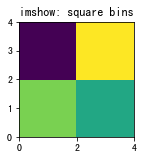

In [589]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(Had, interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]])

`histogramdd`是多维版本，除了输入的数组外，其他参数与前面的基本一致。

In [596]:
rng = np.random.default_rng(42)
a = rng.integers(0, 10, (100, 3))

In [604]:
H, edges = np.histogramdd(a, bins=[5, 3, 4])

In [606]:
H.shape

(5, 3, 4)

In [605]:
edges

[array([0. , 1.8, 3.6, 5.4, 7.2, 9. ]),
 array([0., 3., 6., 9.]),
 array([0.  , 2.25, 4.5 , 6.75, 9.  ])]

`histogram_bin_edges`用来计算bin的边界，只算边界。

不过这里的bin参数支持string，这里定义了很多方法：

- auto：折中的方法获得不错的效果，小数据集一般会采用
- fd：Freedam Diaconis Estimator，大数据集一般会采用

$$
2 \frac {IQR} {\sqrt[3] {n}}
$$

- scott：与标准差成正比，与数据集size的立方根成反比，对小数据集过于保守，但是和大数据集。标准差对异常值不是很鲁棒。在没有异常值时，它的值和FD很相似。

$$
h = \sigma \sqrt[3]{\frac{24 * \sqrt{\pi}}{n}}
$$

- rice：bin的数量与数据集size的立方根成反比，它倾向于高估条柱的数量，并且没有考虑数据可变性。

$$
n_h = 2 n^{1/3}
$$

- sturges：数据集size的2为底对数，此估计器假定数据是正态的，对于较大的非正态数据集过于保守。R语言的`hist`的默认方法。

$$
n_h = \log_{2}{n} +1
$$

- doane：Sturges的改进版本，可为非正态数据集生成更好的估计值。此估计器尝试解释数据的偏斜。

$$
n_h = 1 + \log_{2}(n) + \log_{2} (1 + \frac {|g_1|} {\sigma_{g_1}}) \\
g_1 = mean[(\frac{x - \mu}{\sigma})^3]\\
\sigma_{g_1} = \sqrt{\frac{6(n - 2)}{(n + 1)(n + 3)}}
$$

- sqrt：最简单和快速的估计器，只考虑数据集大小。

$$
n_h = \sqrt n
$$

In [613]:
# 随机数本来就是0-9
np.histogram_bin_edges(a, bins=3)

array([0., 3., 6., 9.])

In [679]:
rng = np.random.default_rng(42)
a = rng.integers(0, 10, 500)

In [680]:
np.histogram_bin_edges(a, bins="auto")

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

`fd`：

In [681]:
IQR = np.percentile(a, 75) - np.percentile(a, 25)

In [709]:
2 * IQR / (a.size ** (1/3))

1.2599210498948732

In [683]:
np.histogram_bin_edges(a, bins="fd")

array([0.   , 1.125, 2.25 , 3.375, 4.5  , 5.625, 6.75 , 7.875, 9.   ])

`scott`:

In [685]:
np.histogram_bin_edges(a, bins="scott")

array([0.   , 1.125, 2.25 , 3.375, 4.5  , 5.625, 6.75 , 7.875, 9.   ])

In [708]:
(24*np.sqrt(np.pi)/a.size)**(1/3)* np.std(a)

1.2524886807479167

`rice`:

In [702]:
# 16个区间（柱子）
np.histogram_bin_edges(a, bins="rice").shape

(17,)

In [707]:
2 * (a.size**(1/3))

15.874010519681994

`sturges`:

In [726]:
np.histogram_bin_edges(a, bins="sturges")

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [725]:
np.histogram_bin_edges(a, bins="sturges").shape

(11,)

In [706]:
np.log2(a.size) + 1

9.965784284662087

`doane`：

In [722]:
np.histogram_bin_edges(a, bins="doane").shape

(11,)

In [721]:
(1+
 np.log2(a.size)+
 np.log2(1+abs(np.mean(((a - np.mean(a))/np.std(a))**3)) / np.sqrt(6*(a.size-2)/((a.size+1)*(a.size+3)))))

9.970039609658638

`sqrt`:

In [723]:
np.histogram_bin_edges(a, bins="sqrt").size

24

In [724]:
np.sqrt(a.size)

22.360679774997898

`auto`：会选择`fd`和`sturges`的较大者。

In [729]:
np.histogram_bin_edges(a, bins="fd").size, np.histogram_bin_edges(a, bins="sturges").size

(9, 11)

In [731]:
np.histogram_bin_edges(a, "auto").size

11

`digitize`会告诉我们输入的数组都属于哪个bin。

In [822]:
x = np.array([0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)

In [825]:
# 0.0 <= 0.2 < 1.0
# 4.0 <= 6.4 < 10.0
# 2.5 <= 3.0 < 4.0
# 1.0 <= 1.6 < 2.5
inds

array([1, 4, 3, 2])

### 计数

`bincount`用来统计非负数组中每个值的出现次数。它也和柱状图有关。

In [761]:
rng = np.random.default_rng(42)
a = rng.integers(0, 10, 100)

In [762]:
sorted(Counter(a).items())

[(0, 9),
 (1, 9),
 (2, 6),
 (3, 9),
 (4, 15),
 (5, 7),
 (6, 11),
 (7, 15),
 (8, 12),
 (9, 7)]

In [763]:
np.bincount(a)

array([ 9,  9,  6,  9, 15,  7, 11, 15, 12,  7])

In [764]:
b = np.array([1, 1, 1, -1, -1, -1])

In [765]:
# 必须非负
np.bincount(b)

ValueError: 'list' argument must have no negative elements

In [758]:
# 必须一维
np.bincount(np.array([[1],[2]]))

ValueError: object too deep for desired array

另外，它还可以指定权重：

`out[n] = out[n] + weight[i]`

默认情况下是：

`out[n] = out[n] + 1`

注意：给定数组是位置，权重和这些位置对应。

In [785]:
c = np.array([2,3,4,2,3,4])

In [806]:
# 在第2 3 4 个位置上+1
# 在第2 3 4 个位置上+1
np.bincount(c)

array([0, 0, 2, 2, 2])

In [819]:
# 在第2 3 4 个位置上+2 3 4
# 在第2 3 4 个位置上+2 3 4
np.bincount(c, weights=[2,3,4,2,3,4])

array([0., 0., 4., 6., 8.])

In [820]:
# loc 0  0.3
# loc 1  0.5+0.2
# loc 2  0.7+1.0-0.6
w = np.array([0.3, 0.5, 0.2, 0.7, 1., -0.6])
x = np.array([0, 1, 1, 2, 2, 2])
np.bincount(x,  weights=w)

array([0.3, 0.7, 1.1])

也可以指定返回的bin数量：

In [767]:
np.bincount(a)

array([ 9,  9,  6,  9, 15,  7, 11, 15, 12,  7])

In [772]:
# 多出2个数字
np.bincount(a, minlength=12)

array([ 9,  9,  6,  9, 15,  7, 11, 15, 12,  7,  0,  0])

`count_nonzero`用来统计非零的数量。

In [738]:
# 统计非0
np.count_nonzero(np.eye(4))

4

In [739]:
np.count_nonzero(a)

453

In [741]:
(a>0).sum()

453